In [1]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

wl = np.linspace(380, 780, 401)
R05 = pd.read_csv('./measurement/TPK/R_5_B.csv')['SCAN'].values

air = ml.Non_Dispersion(1)
sodalime = ml.open_material('sodalime', 'Material')
A1 = ml.open_material('Acrylic', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')
def hypo(th):
    
    SiON1 = ml.Non_Dispersion(th[6])
    SiON2 = ml.Non_Dispersion(th[7])
    SiON3 = ml.Non_Dispersion(th[8])
    SiON4 = ml.Non_Dispersion(th[9])
    hypo_R = tm.Design(
        [air, A1, SiON1, SiON2, ITO, SiON3, SiON4, sodalime],
        [None,th[0],th[1],th[2],th[3],th[4],th[5],None]
    )
    RRR = hypo_R.reflectance(wl, 5)
    return RRR

def fom(th):
    cost_05 = np.mean(abs(100*hypo(th)-R05))
    print(cost_05)
    return cost_05

In [2]:
sol = differential_evolution(
    fom, [
        (1100, 1300), # top O.C.
        (19.25,29.25), # top IM 2
        (12.81,22.81), # top IM 1
        (41.64,51.64), # pattern ITO
        (11.11,21.11), # bottom 2
        (19.59,29.59), # bottom 1 
        (1.75,2.1),(1.45,1.75),(1.45,1.75),(1.75,2.1)
    ]
)
print(sol.x)
print(sol.message)

3.0513910240509556
1.799828615711157
2.2781415160304226
2.0409568187457063
1.7173845938671544
1.191631284573734
2.047215656252543
2.5159934396631862
2.2078682880274236
2.0636312697066157
2.0675686762361867
1.9775459547686165
1.1480182066210873
1.932992928840784
1.6268014231997072
2.3864716692812773
1.8264799340702467
2.093933120269721
2.2137076860493705
2.241846803610275
1.9957983580562584
1.6415677081324427
2.0575863460223784
2.0952905966350173
2.3746607580574763
2.31839776387128
1.5387654484644178
2.3428921875403512
2.216610034619795
2.6285033392678665
2.3144074881357337
2.134313823647228
1.7311515013340162
1.7376866356477367
1.4761683437985391
1.8331077231511077
0.7708560290739842
1.8779125393930216
2.2147531619741967
1.4847958983650977
1.9857061121357982
2.785266399768927
1.4760179499954105
1.4516999640489863
1.3749204790433085
1.8830072038935926
2.310333801283554
2.096669170466801
2.4237707914529745
2.137234287435503
1.5256134467852558
1.3330433232544443
2.056833457738996
2.157838

0.9887947503420226
1.6824682565337863
1.300950092633637
1.1104801735422796
1.5095228185466558
1.8708835117283227
1.3530119095111635
0.8394029222778701
1.7669796791555563
2.0681025460935594
1.8627555742250763
1.9481028995829388
0.8464638367672661
2.164254491168071
0.8320415774588178
1.7408059879816105
2.206021377255138
1.991963604163739
1.4587761524709812
1.9473035807980572
2.060136658813332
1.7636732044703158
1.8069877837531398
1.7078631935533377
1.5203714756698565
2.0479776258227638
1.9793139454868378
2.0167165752671647
1.5819430401977548
1.7094090794015733
1.4197162780076031
1.309749107059353
1.7861593319644222
0.9961257084100322
1.5908208831338149
2.1832105334507013
1.1830715666930396
2.1394330344400703
0.8300889588833015
1.7295052460768523
1.9130259865684784
1.5706169005111588
2.0012205306908015
1.5827140174165497
1.3021622986343193
2.002290022970738
1.6030462588841399
1.3137267414624727
2.2187438657345955
1.8800138979425502
0.8395628771084767
1.4829508623343945
1.026213719908494
2

1.4725620385378213
0.7264272537649646
0.7771162563447568
1.9321204892401362
1.353570509242182
0.7869275261562374
1.2376641132921942
1.2590449796389562
0.9174201454136196
2.4339456263640633
1.3290591483736502
1.9886848836324218
0.9730859586781504
1.8454796368305015
0.8392551882596205
1.2831172211075679
2.5733593628589038
0.9103755854702474
1.0426746454577176
0.752074878382444
1.0376587456938524
1.0426166887127577
1.9780537129090463
0.8217096288164003
2.5347252954287534
1.3776701122644675
1.0486659727259835
1.7986602813421182
1.6760379764253155
1.0667604943475348
0.8010105419069754
1.4074356751848272
1.1433462070156817
1.942157015085375
1.2597204370792157
2.2676332076364805
1.10211727992602
1.7919977767681432
1.105388507897956
2.2415443787629696
1.703388794088895
2.386040767849967
1.888211908273314
1.70965522261516
1.3171751407212964
1.7409957585972393
1.890919778657156
1.48452107136834
1.949280390809984
2.264834490459469
1.1177377165651952
2.038125602886281
1.7758755368706494
1.23492621

1.1484912015096675
1.0341637533259076
2.350739499705735
1.0806753934147244
0.8198306453065407
0.937965169285217
1.2368042590777077
2.8849551970805685
1.6881331223988054
0.8278196203208684
0.9096148057699857
2.1067937471933917
1.7711980806311085
0.808801238830415
1.6484626567544858
1.040933513356878
1.8677445553554974
1.1380611854686207
0.7843650394001446
1.160050641435031
0.8907573073754466
1.0979438564658333
2.019244575861809
1.644501139629558
1.8820475633062983
1.099840986716012
1.3432102190704212
1.094028624998227
0.8810037747547995
0.9413655482657594
0.7665332325462584
2.063717961807994
0.761506576995454
1.4620763853312815
0.8732257658586533
1.7714731231206209
1.5887059087947366
1.0986892454969548
1.7898247753143803
2.64184458962883
1.2651172051164925
1.308382315822916
2.0410948904749606
0.8861343423410416
1.5390744800854503
2.039700840283199
0.8526136792815814
1.8527970156998228
0.8571514908645075
0.968162640321171
0.9211819301595842
1.9875016806965273
1.2488906816955128
1.3552995

0.8617635729897665
1.382615511043195
0.7713971192526786
0.7376312549695382
1.1393920724288817
1.0587715023514601
2.292846773039839
0.794400658349064
0.9452586785811238
2.681591611576266
1.22439750563236
1.203709128074145
0.795187521537919
1.4485868180954875
0.8054367156498593
0.7854785436531155
0.8797574084360928
1.4964274948775143
1.133753266917853
0.7931515997773793
1.6603166601799755
2.076933734027889
1.423395469788041
0.8593756056626449
0.8242846642758684
1.9011107462221273
1.698297029549128
0.8133794648917992
1.0317981552721769
0.8403656762749132
0.9703172252769872
0.8738351263809866
0.9230757047148307
0.7966044051982532
0.814031137364365
1.910070472283327
1.3093885612062552
0.7688134629813899
0.8525990746579267
1.088150105377992
1.5813743168581575
0.7779110294439429
0.8429538133545494
1.2669287638357627
0.8860390354009652
0.7699297002385856
1.0137307994875555
0.7713044999701044
0.8748635135914133
1.746466017232475
0.7410263159124514
0.8119275997544826
0.9235605843355738
0.9403537

0.8738459765340151
1.127111522681283
0.848279720616538
0.7698908466664667
0.8721116631222305
0.8777203382881065
0.8346124136393603
0.9082440065607318
0.7404802443502525
0.7567589570648946
1.6198643558070795
1.194020510556822
1.1173926116999071
1.1648323420916513
2.4370826817545366
0.9277030969965175
0.7198710955191886
0.7248477281595327
1.8329520594887048
0.89252743478861
0.7334152131356123
0.8185637494190549
0.9856329055482373
0.8437680577983292
1.6901838793820136
0.81058734309303
0.8155016764141331
2.019537216945332
0.8646981253980742
0.7369702490297404
0.9432282611568024
0.7755003872874314
2.898326916127044
1.0963667277419222
0.810046021002279
0.7183942889426796
0.76008738463475
1.1747364986956659
0.9134186923426604
0.7974506075733029
0.915551563440979
0.7748144293062507
0.809502838724663
0.9620231223516892
0.8424181212092157
1.026126434786648
0.78558828733079
0.862149574690114
0.8621329880476459
0.7771975391277604
0.8785183602740595
0.8081789499879328
2.375329318029487
0.7306045236

0.7348871143324558
0.8075750917619835
1.7100715175939845
0.9955216045252913
0.7803102963447762
1.5561722452387676
0.7750789218121261
0.8825823830188968
0.8225085874013363
1.3193115981966623
1.197201553288975
1.9483503561303035
1.1426595882732304
1.0646447923852367
0.8206069968896585
0.7193038294953783
0.7207385499253406
0.9185275142057786
1.0456815447057397
0.8034468910359229
0.7465842336974091
0.7939534559158338
0.7434291536412806
0.7916013938232915
1.718014147577124
0.8988549135600128
0.7848963820983398
0.7158340817968682
1.4369476271019779
0.7520799532052688
0.7972501202505673
0.8738658699070161
1.2223399457586153
1.2384017930238707
0.9626035753110486
1.0242840967428242
1.0055061562053909
1.0882007959413171
0.8464814831254832
0.8476293095443228
0.7341403430047347
0.9333157632749063
0.7606252487856637
0.8438657768700367
0.735000768703237
1.254443084587045
0.8628178364063364
0.9937173565137993
1.1836603202387062
0.7338004927480838
0.7456846758959939
0.7718437967644827
0.72949986717204

0.9274288983633385
0.755565826656392
0.7711225500726063
0.7695821934491404
0.7451344713463234
0.9454954462315643
0.9358979130609015
0.8652796221180188
0.7226894376792969
0.7921699946680473
0.8137934565437235
1.365089886422831
1.596574595978312
0.7629663234981372
0.7358997925955885
0.7459167787498078
2.3841063180505713
0.7242807325935346
0.8230438709669763
0.9929181158528267
0.8321729918090559
1.5113413123212072
0.8663227049600563
0.816196576646319
0.8277878216398655
0.7589774005409915
0.8778854741954926
0.8538633327406551
1.0540690247565665
1.1519314939412606
0.7121919116518892
0.832717313178071
1.5081328110740544
0.9892358093454123
1.428219677649837
0.8314955742105817
0.8106462059912524
0.7394182714851298
0.8138289802253215
1.0076224689150424
1.7531464126188225
1.137539970959575
0.9571434650842633
0.8271959522371449
0.9586536878147489
0.7875082139973016
0.9695934342473418
1.0746003667407302
0.7872625610579274
0.9369989079393362
1.0582878252426007
0.8010538431230699
0.8241468531253258


0.8697616370296647
0.9778830336303714
1.0451410595096802
0.788666573688775
0.737150613021217
0.8668413724325897
0.7970042233939536
0.7174597507792339
1.2161146495206163
0.7544629940677547
0.7155017582982856
0.9108016780174419
0.7554097884207688
0.7971746880800252
0.7026870739704247
0.8184843585616182
0.7607939775053005
0.7174458229017369
0.72137142317355
0.8077006745754307
0.7013305485649519
0.7571472797704877
1.233051640151681
0.7456280347030642
0.7994868772418261
1.0065917379450438
1.1960164990720468
0.7736779563537104
0.7816109875777476
0.7982840875803254
1.0580955926509388
1.1323931954295723
0.7400881094641041
0.9349440459405515
0.7802765324335138
0.8200509078126679
0.7394962295584228
1.0042567687795043
0.8126658553492294
0.8694013087053454
0.7034937657259048
0.7083097875562879
0.9916378525627144
0.9416042156717852
0.7174218160442553
0.9417154766538272
0.9865812651642905
0.7885853916459827
0.786026812426808
0.7671179122440399
1.2804131605534697
0.7820403605848392
0.9295283334754345

0.7623214481641821
1.88115976307856
0.8285269524921107
1.1792169857524182
1.213709145514419
1.0365274704174043
0.7380280894826415
0.7843373436552515
0.8566385682541745
0.9625111748958978
1.5270881182321578
0.7392573576896775
0.7244581283273195
1.011680437202177
0.8898521338900918
0.7714012617741564
0.735846258679476
0.7473700661811442
1.1214737957297805
0.765489478785392
1.6076741069667668
0.7223515254808858
1.7719819139060042
0.777827436940018
0.7280506259857199
0.7257150360516093
0.7565661259378227
1.0811678186310107
0.8074267849251113
0.7405555319832631
0.7404521119967062
0.9448198643212875
0.7975299709853445
0.7727260224100926
0.7530926381818014
0.9330130732406219
1.0714138828212019
0.9394959252464211
0.732089139591895
1.0621779507577465
0.7157799308221698
0.8258804111673187
1.4844828397576624
0.7088197821902907
1.2458485915295463
1.0531074138094494
0.9966082056084317
0.8389334440881926
0.7849240406781303
1.200860184129957
0.8520821214414956
0.7233093923649055
0.9568269946074988
0.

1.0475227862132355
0.6940182036831851
0.9999257519955178
0.8776160044043827
0.7985049533085743
1.0795682538269016
0.9268293470730314
0.907605183470217
0.7039425274785629
0.7141226855006598
0.8034783691979251
1.9644692325217779
1.0443330709664496
0.9509308776490796
0.7851476185975046
0.7196067751441607
1.200133642758847
0.767461777963291
0.7488755526081193
1.289957545524896
0.7245532962454372
0.9189174595148132
0.7625431406471688
0.8270307876932503
0.6962179371371937
0.7116364412991149
0.7396410364379524
0.7647929102782104
0.7149496562692446
0.8077788614497732
0.8795825562626383
0.7281435775925184
0.8651537525105969
0.786655590787909
0.7618615709877836
0.7215031518393104
0.7297425499264468
1.0438759754697577
0.721397301112111
0.6922036481077923
1.417427619752692
0.7082416582977615
0.9074555869002583
0.7542076441615657
0.9100815279786939
1.9671509461279686
1.2063479889793172
1.1755004722025826
0.7340831599584442
0.7966360982775879
0.7161622914087518
0.7944660541956508
0.7487410546550586


0.7713769273495664
0.7187711135717018
1.2065416741682027
0.705589373107128
0.7793649064779556
0.8645019803437689
2.044979476239053
1.159824834247446
0.7861830139038264
0.8698614951188715
0.7258664101136643
0.8318596455674984
0.95555107901805
0.8725042222084471
0.8120152512621044
0.7917296521029511
1.411756344234494
1.075355841506145
0.987532569039682
0.7998022871198753
0.8324523813047202
0.7222845892794633
1.4595285555855446
1.303692346459178
1.6298407060936488
0.8283488354929359
0.9276024074111305
0.9467069094103971
1.6138454615165072
1.0306766181135898
0.7480281059764213
0.9596399387459854
0.9053719758743968
0.7546279071771005
1.1804438982239
1.0954119665584676
1.2610464126999394
1.3906695881993403
0.8629226026364066
1.0650906397313455
0.7985908866511884
0.7465870587717268
1.7358396514781564
0.8462244576134907
0.7570682533506434
0.7281942119934499
0.8059903118301319
1.7522542983386622
2.048448214959974
0.8353354660496322
1.2140081585988487
1.583403823690649
0.7599249661020606
0.69741

0.7182145618112956
0.8379031577449414
0.8243353365098506
1.4072245168163173
0.9311513477132175
1.013435454389342
1.3991630353725952
2.0598656762362317
0.8859109903086022
1.058491811438369
1.0500103875883215
0.9708558233246319
1.311624555245558
0.8703440670524906
0.9784848538771028
0.7635551719943974
2.2673730622872523
0.9869962351919158
1.0363715196676835
1.0963828967683817
0.7958531576504999
2.2201594161553295
2.1142498739502273
0.7326261702999233
1.2982539627133882
0.7294974774219983
0.934932953313607
1.0796102236641005
0.7418333781340514
0.7230143018394714
1.0161629802553798
0.8715103000092382
1.8810743438552704
1.021030980560801
0.7687617640637556
0.7516271349607982
0.6978341023692206
0.8029385165634569
1.6987711717176726
1.2717184486884374
1.069807618256885
0.8840748053704162
0.781056782359361
0.9275564529654946
0.8042996294711056
0.7185466345934318
1.7586287045372297
0.8387173723300816
0.7030512438960191
0.7873211545846991
0.8814203131150822
0.8166635742612484
1.047044881572982
2

1.041565062611424
1.293538190135101
0.808545878763248
1.0010040017573862
1.2903728442285418
0.7151207389335513
1.3922633403984914
0.8120110234094523
0.7331303945469605
1.9294429350756441
0.8290102307597911
0.7091471560174084
0.89016780897327
0.7290321090426843
1.0245595380982753
0.6856009177574958
0.700189912353453
0.9830778336787577
0.8477499560952082
0.8437241736765436
0.7348366592902968
0.9173992464669465
0.930342481386359
0.7148125109601975
0.7808083256859124
0.7441344472769239
2.467467276852021
1.6932120888894475
0.7825151503283493
1.0856519963923343
0.7160915371122666
0.9748655439195976
0.7619877805485805
1.3171319821041336
2.033476200885643
0.7788060699519824
0.892243186580948
0.7481831599925544
0.704923499851149
0.7069109590811432
1.243717749117839
1.8846424219566098
0.7947621976703895
0.7060813308563136
0.8957838255180557
0.7778590136741553
0.7196378668690596
0.70813506390922
0.8387712634538508
2.7216999673655415
1.46792078547032
0.7967121104609906
0.7671228079642509
2.5649170

0.8867403814226065
1.81718698859322
1.1514148547966114
0.7293133956636787
0.7567300187566763
0.709480335117957
0.8211761168092526
0.8506039354797048
1.3544183842122466
0.7759626304003735
1.1899601126662194
1.2236414391870165
0.7124216695944439
0.7123587554783121
0.7052500570711288
0.6902269008007883
0.836182261782771
1.1897239540746583
0.7082184685324092
0.7210453304120055
0.932753985887557
2.540245632199915
0.7692878204192201
1.1617965826099774
0.9877170558043875
0.742622654624588
0.6960072662091531
1.1338956128172157
0.9243360318662572
0.8204310222879926
0.7299765833735429
0.9316341599446968
0.7328903035651392
1.5276280472469472
2.47117870377321
0.9863066679961369
0.7262399359976656
0.7015447868820157
0.7376566465600418
2.2262661367018515
1.1643730209029535
0.7098049184209602
0.8327565684966435
0.7677974320151831
0.9113046321800115
0.9152822452733713
0.7750692980688253
1.0079146192807564
0.6894141253270196
1.9458951482925066
1.0039985381846992
0.7298489565917798
0.7618436573582286
1.

0.75815125669425
2.322113961704369
0.7733513046319789
0.7601886594035878
0.7403977540449805
0.728980910191014
0.7102086046288322
1.5798125118637711
0.9065240185091544
1.4671192293191477
0.7264505015480687
0.7039717771192437
0.7856491433300975
0.6980376423899218
0.8043403170747814
0.696303587205445
0.7897689460085502
0.8116514852966076
0.7207172362620341
0.7865502834162534
0.9857382902589662
0.7113541220414499
0.7181043769059624
0.8515924008104117
0.7919146114856301
1.9624544222385776
1.136753990268375
0.7355442102426812
2.118171623696643
0.8431058969556662
0.7165971576634956
2.6620006196416073
0.7362400932186743
0.7225204303897108
0.8413041635353357
0.7805009165554168
0.7486661931389988
0.827110291173512
0.7243835470153822
0.7412279883482806
1.0895038636985306
0.8131043175755713
0.7944807216816223
0.778483203368095
1.063516783194415
0.8713176986751804
0.7801550749846571
0.7144972552947598
0.8233850501936366
0.9426219279739502
0.8540922398910622
0.7567503054603201
1.3420640162756483
1.0

1.6951240866359878
1.3983505205413191
0.7100051846280955
1.3782777506080988
0.9308588392403244
0.8107084457168181
1.5094901335308442
0.7818273825151411
0.7953635350457731
0.7963227836897461
0.7281559700108161
0.9110334761270865
2.748967075667451
0.7015588989352565
2.0029851203078337
1.0492301199101137
0.8332562459758349
0.8683083732462891
0.7932546520866457
0.830522063513178
0.7148698481491633
0.8641941020219407
1.428988203570631
1.5389055257451072
0.7483751950247626
2.22482651276876
0.900104922350158
0.7366416579233566
0.7708431303760815
0.7111553313152206
1.9633046633675055
0.8215847335551415
0.7411108963529145
0.7510156353985744
1.508874806973758
0.7036290150118703
0.7153551950376714
0.6888855793286088
0.876678440963334
1.571592329069812
1.0156701454941865
1.0460762893416264
0.7591217192766746
0.691479444462503
0.7951919508571165
0.7654513772355439
1.37810614034168
0.7892742848095508
0.7288524662586813
0.7095258795040447
0.9604292795309347
0.7118238224371236
0.7301553577714871
1.172

0.7321173802232158
2.5568784447305912
0.7025151395115158
0.6811276368004869
0.7359442210069224
0.7228793457751973
0.7027742446888731
0.7402697166716067
0.7141953463748667
0.7035287994287791
0.6931744868202706
0.7497343235160522
0.7254809885212075
1.157475960058104
0.6966872423272797
0.7021254201308176
0.6907846222848165
0.6886928724070042
0.7982223838619733
0.8320071279730188
0.8206106713228689
0.7269608268817576
0.7498161703357187
0.7166119430294422
0.6982303434657907
0.725331169674597
0.8539271075406498
0.7324131736603902
0.7713529819673954
0.7792043664034678
0.8333941565749459
1.1158644055470779
0.7255973400722637
0.6914023780716909
0.8223990403527841
0.7826058152128493
0.7800205756730219
0.7073753245948289
0.705022495902329
0.7017316446808318
0.7292544676948718
0.7905190693006554
0.7689616562128571
0.8578179895480602
0.6908067433653989
0.7232339811737766
0.7792642834500352
0.6902373898684933
0.7101506086351407
0.7727360172298121
0.7216842622949096
0.7825274787680084
0.9713565212333

0.6918495863307441
0.6867526479599094
0.7156648404965523
0.962848014754479
0.6813686708184022
0.8851736390709676
0.808720293292857
0.8623362411855112
0.99653060472541
0.7687821149094791
0.7475248902573551
1.0488107225534649
0.6894481997064785
0.6898887442884438
0.9106406010510487
0.830797478472874
0.6942636425715458
0.7506221334705226
1.051507848986131
0.7129090157531371
0.705441612973185
0.7241161424999021
0.7211246773873481
0.691545145832675
0.6926572002395585
0.6823199371088747
0.700919056682086
0.9442262241974997
0.7335349126994504
0.7084567167516023
0.7618305853720622
0.7004358911086649
0.7913103402392557
0.749080048325398
0.73241772190117
0.7027666105402491
0.6994761817073525
0.7142653891652907
0.7831458941187578
1.3877261511320051
0.7463761315332879
0.7155647489980351
0.6864230074120478
0.786775717105062
0.6893411386463206
0.6974989410797304
0.8399867645777043
0.7789351597161497
0.8644451536765244
0.7218299576807081
0.7010340485632348
0.7613554998859575
0.935076999123833
0.92759

0.7889904474506776
0.7321086504708914
0.7261349763311836
0.8933213738467971
0.7215753179176352
0.6926867668315717
0.8156486299083153
0.8101190792284457
0.7118724715042156
0.6993694463047279
1.1342248620956574
0.7732004017544925
0.731190400670111
0.7287284376326468
0.7327837076428619
0.9531385137090785
0.6915323668155644
0.9216976209384792
0.6928002293171536
0.6882989800461392
0.6938640136646111
0.7833598399840574
2.0610804350737473
0.7265008461326724
0.9699909005974227
0.7079394698930475
0.788068993895296
0.6939548738790124
0.743189925534566
0.7487973555259678
0.7036542213679942
0.7262712943410831
0.7230858217643489
0.7262354608435907
0.9259209156531929
0.805304414779261
0.8151655269158417
0.702615816687952
0.7609539038658446
0.7274668097301694
0.7573457708838157
0.9143007364291219
0.6913023145775936
1.1319625109250704
0.7189326150448331
1.0399241613536585
0.7477010360609664
0.7562246740843007
0.7136753202394077
0.75926688605758
0.7693559617159991
1.0708002927620746
0.7335934817706417


2.14757191470222
0.6932734764362262
0.7831374114062984
2.4131721166536524
0.7860051983379748
0.7335637731906295
0.6996360396838607
1.1965248877285704
0.6922729605766335
0.6915621441727763
0.7862795015642764
0.6885057235980683
0.8647195381574808
0.6798942535838667
1.1458233553632016
0.6851602559021243
0.7031708161692342
0.7031912331824356
0.7237482888553152
0.7085286805148635
0.7287163227302188
2.65075431448323
0.6800129666834405
2.363996984533
1.3067915759899105
0.6821204214556776
1.0278431850121057
2.575312254845411
1.8340104703691873
2.0255062029428728
1.921350442422902
0.7655304552837577
0.8534005505339343
0.711567702381536
1.9419297949142529
0.7852727716831889
0.8930821681153166
0.7163792131303901
0.7096180252696098
0.7345806925113886
0.7376879234846968
0.8237511300969754
0.6862462345703015
0.7078822984224993
0.6824462271467192
0.892209264850955
0.7056198436289866
2.6402289115959063
0.6956859614883115
1.9652913229053557
0.6935172548984906
1.0233404268459354
0.6892772986122255
1.094

0.8603354426085366
1.1793383089539884
0.7231101291004032
0.684734852403302
0.6885719176646584
1.3347912355713358
0.7935911427254605
0.7492364019574561
0.6927326934185453
1.2962263061271961
0.7378682806938306
0.676255746834002
0.6820623863620014
0.7747689919428896
1.0533568683867038
1.0611534193804668
1.4381950327686133
1.4565969043145945
2.12163197027454
0.6825150360925747
0.7126977472411258
0.8352483019051964
0.7652492168618952
1.0187858072541554
0.8120455039489801
1.134211460043861
0.698962573260117
0.8349728998050109
0.7049619218361167
1.0166503182722022
0.7267483114441592
0.6929966359492674
0.6848111121414431
0.8248187965657088
1.2813787217423624
1.0777148564824008
0.7829357326276969
0.7088106842044535
0.7271681598881843
0.6991789316711131
0.7184071968293473
0.8294168034487932
0.8782332625203914
0.7302104282568465
1.2927627604349785
1.5713522061776988
0.7163206102271962
0.7351585916856913
0.7777635727321
1.0405054563150542
0.6934499406270835
1.206934066135625
0.722344333446414
2.50

0.6891058322192295
0.7975587668479314
0.6896126318596747
1.069965017874961
0.7834276253956365
0.8501515708699292
0.7030823373949697
0.7539175409779619
0.6901117365529912
0.902905934652951
0.9361406121150507
1.0848477437345863
0.7160809704921473
0.7262167457353362
1.1449317747002352
0.8392973751873823
1.214945588012144
0.827322588445891
0.7349532452103914
0.7116819818054563
1.0213231534397704
0.8273921983264337
0.7726848090236275
1.6393401788482311
0.7360002541513593
1.0877202079564923
0.7219209127831143
0.6911324945507806
0.6834053937674727
0.8567799759163511
0.6869452230903149
0.8389013370427436
0.8831374953840019
0.7249941829058305
0.688240440168907
0.6946024364658573
0.7908216762220394
0.7204985115988055
1.055437374577626
1.5694897847217724
0.9270922746276098
0.7078527041562508
0.7036974711307016
0.6921833143626466
2.275468570839558
0.7089845624989768
1.1429526006836925
1.2750806460210118
1.428374219631903
1.0350834902041735
0.7581822980399489
0.7089447344197616
1.1379993046339505
1

0.6754424078351533
0.6754424059500436
0.6754424075837742
0.675442409344388
0.675442409585058
0.6753735415664093
0.6753735415724437
0.675373541546167
0.6753735415372332
0.6753735415539551
0.675373541540886
0.6753735415424967
0.6753735408917022
0.6753735417828262
0.6753735422780852
0.6753735424308962
0.6753610129945478
0.6753610130006001
0.6753610129742892
0.6753610129653385
0.6753610129820719
0.6753610129690214
0.6753610129706346
0.6753610123190915
0.6753610132120381
0.6753610137055811
0.675361013858387
0.6753173105560063
0.6753173105615005
0.6753173105374884
0.6753173105312272
0.6753173105472553
0.6753173105342014
0.6753173105359697
0.6753173098405487
0.6753173105601439
0.6753173112960948
0.6753173117913165
0.675280489687421
0.6752804896931105
0.6752804896672384
0.6752804896731232
0.6752804896875562
0.6752804896750425
0.6752804896775026
0.6752804882876005
0.6752804889691275
0.6752804907771205
0.675280492067836
0.6752746196552228
0.6752746196609207
0.6752746196350268
0.6752746196408979


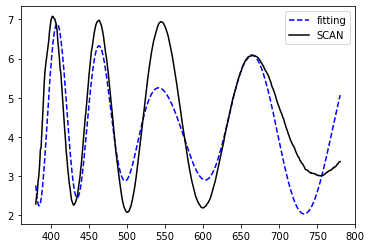

In [4]:
plt.plot(wl, 100*hypo(sol.x),'--b', label = 'fitting')
plt.plot(wl, R05, '-k', label = 'SCAN')
plt.legend(loc = 'best')
plt.savefig('11.png')
plt.show()